In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

link to the data: https://www.pxweb.bfs.admin.ch/pxweb/fr/px-x-0304010000_201/px-x-0304010000_201/px-x-0304010000_201.px


In [6]:
datapath = '/home/cyrill/dev/MASTER/vi-projet-inequality/data/12-22_suisse_sect26_tout_tout.csv'
df26 = pd.read_csv(datapath, sep=';', encoding='utf-8')

# quick overview
print("Shape:", df26.shape)
print("\nColumn names:", df26.columns.tolist())
print("\nData types:", df26.dtypes)
print("\nMissing values:", df26.isnull().sum())

print("\n--- Sample Rows ---")
display(df26.head())

Shape: (720, 10)

Column names: ['Année', 'Grande région', 'Division économique', 'Position professionnelle', 'Sexe', 'Médiane', 'P10', 'P25', 'P75', 'P90']

Data types: Année                         int64
Grande région                object
Division économique          object
Position professionnelle     object
Sexe                         object
Médiane                     float64
P10                         float64
P25                         float64
P75                         float64
P90                         float64
dtype: object

Missing values: Année                        0
Grande région                0
Division économique          0
Position professionnelle     0
Sexe                         0
Médiane                     47
P10                         47
P25                         47
P75                         47
P90                         47
dtype: int64

--- Sample Rows ---


,Année,Grande région,Division économique,Position professionnelle,Sexe,Médiane,P10,P25,P75,P90
0,2022,Suisse,"> 26 Fabrication de produit informatiques, éle...",Position professionnelle - total,Sexe - total,7365.0,4824.0,5779.0,9571.0,12464.0
1,2022,Suisse,"> 26 Fabrication de produit informatiques, éle...",Position professionnelle - total,Femmes,6043.0,4286.0,4965.0,7824.0,10251.0
2,2022,Suisse,"> 26 Fabrication de produit informatiques, éle...",Position professionnelle - total,Hommes,8073.0,5458.0,6500.0,10295.0,13362.0
3,2022,Suisse,"> 26 Fabrication de produit informatiques, éle...",Cadre supérieur et moyen,Sexe - total,12787.0,8017.0,9838.0,17098.0,24351.0
4,2022,Suisse,"> 26 Fabrication de produit informatiques, éle...",Cadre supérieur et moyen,Femmes,11911.0,6500.0,8720.0,16232.0,22738.0


In [7]:
# Convert data of type object to numeric
num_cols = ['Médiane', 'P10', 'P25', 'P75', 'P90']
for col in num_cols:
    df26[col] = pd.to_numeric(df26[col], errors="coerce").convert_dtypes()
    
print("\nNumeric conversion check:\n", df26[num_cols].dtypes)




Numeric conversion check:
 Médiane    Int64
P10        Int64
P25        Int64
P75        Int64
P90        Int64
dtype: object


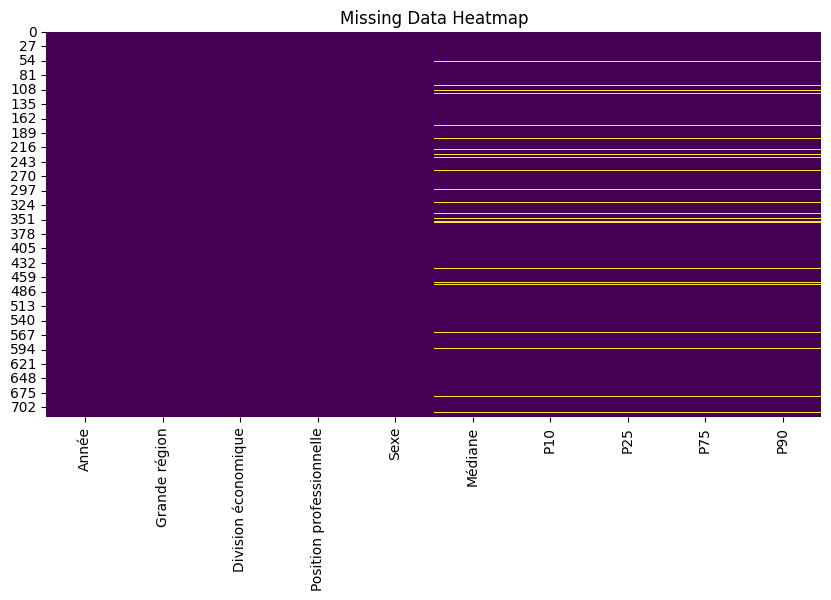

In [8]:
# --- 6. Missing Data Visualization ---
plt.figure(figsize=(10, 5))
sns.heatmap(df26.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Data Heatmap")
plt.show()

In [22]:
print("Number of missing values per column: \n",df26.isna().sum().sort_values(ascending=False))

num_cols = ['Médiane', 'P10', 'P25', 'P75', 'P90']
missing_df = df26[df26[num_cols].isna().any(axis=1)]
print(missing_df['Année'].value_counts().sort_index())


Number of missing values per column: 
 P75                         47
Médiane                     47
P90                         47
P10                         47
P25                         47
Année                        0
Grande région                0
Sexe                         0
Division économique          0
Position professionnelle     0
dtype: int64
Année
2012     6
2014     6
2016     7
2018    12
2020     8
2022     8
Name: count, dtype: int64


In [23]:
print(missing_df['Grande région'].value_counts())


Grande région
Ticino              23
Ostschweiz           9
Zentralschweiz       8
Nordwestschweiz      6
Région lémanique     1
Name: count, dtype: int64


In [24]:
print(missing_df['Position professionnelle'].value_counts())

Position professionnelle
Responsable de l'exécution des travaux    19
Cadre inférieur                           15
Cadre supérieur et moyen                  13
Name: count, dtype: int64


In [ ]:
# Median values exploration
# make subplot for 4 plots

#TODO: boxplot corrections:
# - for Gender distributions: take Suisse-total, position_total
gender_mask_h = ((df26["Grande région"] == "Suisse") & (df26["Position professionnelle"] == "Position professionnelle - total") & (df26["Sexe"]=="Hommes"))
gender_mask_f = ((df26["Grande région"] == "Suisse") & (df26["Position professionnelle"] == "Position professionnelle - total") & (df26["Sexe"]=="Femmes"))

# optional: repeat for median, P10, P25, P75, P90 -> does this make sense or we have it already?
# put a phrase above each plot to explain what is looked at
# for other distributiosn: double each for women and men
# - for region distribution: take position_total
region_mask_h = ((df26["Grande région"] != "Suisse") & (df26["Position professionnelle"] == "Position professionnelle - total") & (df26["Sexe"]=="Hommes"))
region_mask_f = ((df26["Grande région"] != "Suisse") & (df26["Position professionnelle"] == "Position professionnelle - total") & (df26["Sexe"]=="Femmes"))
# - for position distribution: take region_total
position_mask_h = ((df26["Position professionnelle"] != "Position professionnelle - total") & (df26["Grande région"] == "Suisse") & (df26["Sexe"]=="Hommes"))
position_mask_f = ((df26["Position professionnelle"] != "Position professionnelle - total") & (df26["Grande région"] == "Suisse") & (df26["Sexe"]=="Femmes"))


df1 = df26.loc[position_mask_h]
df1



In [ ]:
df26["Sexe_clean"] = df26["Sexe"].map({"Hommes": "Hommes", "Femmes": "Femmes"})

plt.figure(figsize=(15, 12))
plt.subplots_adjust(hspace=0.35, wspace=0.3)

# ---------------------- Helper for separator lines ----------------------
def add_category_separators(ax):
    categories = ax.get_xticks()
    for c in categories:
        ax.axvline(c + 0.5, color="lightgray", linestyle="--", linewidth=0.7)
    ax.tick_params(axis='x', length=0)   # remove tiny ticks

# ---------------------- 1) REGION distribution ----------------------
plt.subplot(2, 1, 1)
df_region = df26.loc[region_mask_h | region_mask_f]

ax1 = sns.boxplot(
    data=df_region,
    x="Grande région",
    y="Médiane",
    hue="Sexe_clean",
    palette=["gray", "lightgray"]
)
add_category_separators(ax1)

plt.title("Median Salary by Region — Men vs Women")
plt.xticks(rotation=45)

# ---------------------- 2) POSITION distribution ----------------------
plt.subplot(2, 1, 2)
df_position = df26.loc[position_mask_h | position_mask_f]

ax2 = sns.boxplot(
    data=df_position,
    x="Position professionnelle",
    y="Médiane",
    hue="Sexe_clean",
    palette=["gray", "lightgray"]
)
add_category_separators(ax2)

plt.title("Median Salary by Professional Position — Men vs Women")
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


## Feature Engineering

In [13]:
df26_columns = df26.columns.tolist()
df26_columns = df26_columns[0:6]
df26.head()

,Année,Grande région,Division économique,Position professionnelle,Sexe,Médiane,P10,P25,P75,P90
0,2022,Suisse,"> 26 Fabrication de produit informatiques, éle...",Position professionnelle - total,Sexe - total,7365,4824,5779,9571,12464
1,2022,Suisse,"> 26 Fabrication de produit informatiques, éle...",Position professionnelle - total,Femmes,6043,4286,4965,7824,10251
2,2022,Suisse,"> 26 Fabrication de produit informatiques, éle...",Position professionnelle - total,Hommes,8073,5458,6500,10295,13362
3,2022,Suisse,"> 26 Fabrication de produit informatiques, éle...",Cadre supérieur et moyen,Sexe - total,12787,8017,9838,17098,24351
4,2022,Suisse,"> 26 Fabrication de produit informatiques, éle...",Cadre supérieur et moyen,Femmes,11911,6500,8720,16232,22738


In [14]:
# calculating inequality for each case
# 1. find indexes i of all 'Femmes'
# 2. compute inequality percentage by makein inequality[i] = médiane[i](femmes) / médiane [i+1](hommes)

pivot_df26 = df26.pivot_table(
    index=['Grande région', 'Année', 'Position professionnelle'],
    columns='Sexe',    # take uniques from 'Sexe' as columns
    values=['Médiane', 'P10', 'P25', 'P75', 'P90']   # put values 'Médiane' form table into the new columns from 'Sexe'
).reset_index()
print(pivot_df26.head())

# Drop total-sex columns
cols_to_drop = [
    ('Médiane', 'Sexe - total'),
    ('P10', 'Sexe - total'),
    ('P25', 'Sexe - total'),
    ('P75', 'Sexe - total'),
    ('P90', 'Sexe - total')
]
pivot_df26.drop(columns=cols_to_drop, inplace=True, errors='ignore')

#pivot_df26['inequality_%'] = ((pivot_df26['Femmes'] / pivot_df26['Hommes']) * 100 - 100).round(2)

# Compute inequality for each percentile (Femmes / Hommes - 1) * 100
for col in ['Médiane', 'P10', 'P25', 'P75', 'P90']:
    femmes_col = (col, 'Femmes')
    hommes_col = (col, 'Hommes')
    ineq_col = (f'Inequality_{col}', '%')
    pivot_df26[ineq_col] = ((pivot_df26[femmes_col] / pivot_df26[hommes_col]) * 100 - 100).round(2)
pivot_df26.columns = ['_'.join(filter(None, col)).strip() for col in pivot_df26.columns.values]


          Grande région Année                Position professionnelle  \
Sexe                                                                    
0     Espace Mittelland  2012                         Cadre inférieur   
1     Espace Mittelland  2012                Cadre supérieur et moyen   
2     Espace Mittelland  2012        Position professionnelle - total   
3     Espace Mittelland  2012  Responsable de l'exécution des travaux   
4     Espace Mittelland  2012                  Sans fonction de cadre   

      Médiane                           P10                          P25  \
Sexe   Femmes   Hommes Sexe - total  Femmes  Hommes Sexe - total  Femmes   
0      7966.0   8800.0       8616.0  5653.0  6784.0       6611.0  6787.0   
1     10075.0  11602.0      11286.0  6258.0  7356.0       7055.0  7469.0   
2      5023.0   6790.0       5878.0  3978.0  4745.0       4252.0  4453.0   
3      5725.0   6967.0       6511.0  4247.0  5142.0       4764.0  4910.0   
4      4917.0   6068.0       540

#### Idea How to construct data that represents "inequality":

we have the following data for each year and region:

median, P10, P25, P75 and P90 for each of position.
1. use **MAP** for **REGIONS**
2. use **SCROLLER** for **YEAR**
3. use a **DROPDOWN** menu for the **POSITION**

then use a **COLOR** to visualize the **MEDIAN** of inequality.

First, only use the MEDIAN values:
i need a inequality-value for each combination of YEAR x REGION X POSITION. This makes 6 x 7 x 4 =  168 values.

In [15]:
# dataframe for only year 2012 and position Cadre Inférérieur
df26_2012_cadre_inf = pivot_df26[
    (pivot_df26['Année'] == 2012) &
    (pivot_df26['Position professionnelle'] == 'Cadre inférieur')
][['Grande région', 'Inequality_Médiane_%']]

## merge this with the geo data in app.py
# -> ge_df...

In [16]:
# find uniques in column 'Année'
years = df26['Année'].unique().tolist()
regions = [r for r in df26['Grande région'].unique()] # if r != "Suisse"]
positions = [p for p in df26['Position professionnelle'].unique()] # if p != "Position professionnelle - total"]

In [17]:
# initialize an empty dataframe with columns: Year, Region, Position, inequality_%
df_inequality = pd.DataFrame(columns=['Year', 'Region', 'Position', 'Inequality'])
# loop over years, regions and positions
for year in years:
    for region in regions:
        for position in positions:
            med_salary_f = df26.loc[(df26["Année"] == year) &
                                    (df26["Grande région"] == region) &
                                    (df26["Position professionnelle"] == position) &
                                    (df26["Sexe"] == "Femmes"), "Médiane"].values
            med_salary_h = df26.loc[(df26["Année"] == year) &
                                    (df26["Grande région"] == region) &
                                    (df26["Position professionnelle"] == position) &
                                    (df26["Sexe"] == "Hommes"), "Médiane"].values
            inequality_pct = ((med_salary_h - med_salary_f) / med_salary_h * 100).round(2)[0]
                
            # append to df_inequality
            df_inequality = pd.concat([
                df_inequality, 
                pd.DataFrame({
                    'Year': [year],
                    'Region': [region],
                    'Position': [position],
                    'Inequality': [inequality_pct]
                })
            ], ignore_index=True)

/tmp/ipykernel_27672/4064984933.py:18: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_inequality = pd.concat([


In [18]:
print(df_inequality.shape)
print(df_inequality.head())

(240, 4)
   Year  Region                                Position  Inequality
0  2022  Suisse        Position professionnelle - total       25.15
1  2022  Suisse                Cadre supérieur et moyen        8.03
2  2022  Suisse                         Cadre inférieur        4.38
3  2022  Suisse  Responsable de l'exécution des travaux       12.72
4  2022  Suisse                  Sans fonction de cadre       22.22


In [19]:
df_inequality.to_csv('../data/inequality_by_region_position_year.csv', index=False)

In [20]:
dfinq = pd.read_csv('../data/inequality_by_region_position_year.csv')
dfinq.loc[(dfinq["Year"] == 2022) & (dfinq["Position"] == "Sans fonction de cadre")]
# dfinq.head()

,Year,Region,Position,Inequality
4,2022,Suisse,Sans fonction de cadre,22.22
9,2022,Région lémanique,Sans fonction de cadre,14.30
14,2022,Espace Mittelland,Sans fonction de cadre,16.16
19,2022,Nordwestschweiz,Sans fonction de cadre,15.67
24,2022,Zürich,Sans fonction de cadre,23.54
29,2022,Ostschweiz,Sans fonction de cadre,27.69
34,2022,Zentralschweiz,Sans fonction de cadre,22.34
39,2022,Ticino,Sans fonction de cadre,18.81
